In [28]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/MachineLearning/main/Datasets/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
#Ver estadisticas de los datos
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#Verificar si hay datos nulos
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#Ver tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
print(df['Sulfate'].mean())
print(df['ph'].mean())
print(df['Trihalomethanes'].mean())

333.7757766108146
7.080794504276821
66.39629294676803


In [8]:
df['Sulfate'] = df['Sulfate'].replace(np.nan,333.77577661081335)
df['ph'] = df['ph'].replace(np.nan,7.080794504276821)
df['Trihalomethanes'] = df['Trihalomethanes'].replace(np.nan,66.39629294676803)

In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
df = df.dropna(how='any')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


0 no potable
1 potable


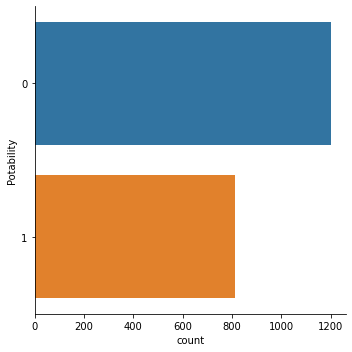

In [ ]:
g = sns.catplot(y='Potability',data = df, kind='count')

#Entrenamiento

In [11]:
x = df.drop(columns='Potability')
y = df['Potability']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [13]:
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()
#entrenando modelo de regresión logistica
regresion_logistica.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print("Precision del modelo por regresin logistica: ",regresion_logistica.score(x_train,y_train)*100)

Precision del modelo por regresin logistica:  60.57251908396947


#Arboles de decision

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print("Precicion con el modelo ARBOLES DE DECISION: ",tree.score(x_train,y_train)*100)

Precicion con el modelo ARBOLES DE DECISION:  100.0


In [21]:
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(x_train, y_train)
    score = arbol_clasi.score(x_test, y_test)
    accuracy.append(score)

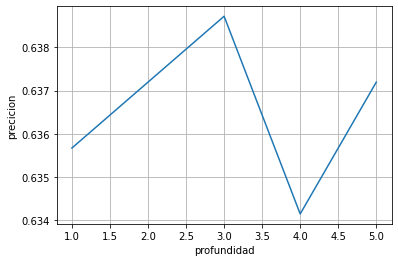

In [35]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('precicion')
plt.xlabel('profundidad')
plt.grid(True)
plt.show()

In [24]:
arbol_clasi = DecisionTreeClassifier(max_depth = 3, random_state = 0)

arbol_clasi.fit(x_train, y_train)

accuary = arbol_clasi.score(x_test, y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 63.87195121951219 %


In [30]:
y_train_pred = tree.predict(x_train)
# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(x_test)
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train)*100)
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test)*100)
accuary_global = tree.score(x_test, y_test)

Accuracy sobre conjunto de Train: 100.0
Accuracy sobre conjunto de Test: 58.079268292682926


In [32]:
x.keys()

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [34]:
#Instanciamos la lista de valores que toma el arbol
class_names_list=list(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(tree,feature_names=class_names_list, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_1.png')

True

#Regresion lineal

In [16]:
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression()
regresion_lineal.fit(x_train, y_train)
y_pred = regresion_lineal.predict(x_test)
print("Precicion con el modelo REGRESION LINEAL: ",regresion_lineal.score(x_train,y_train)*100)

Precicion con el modelo REGRESION LINEAL:  0.31910406899876564


#Support Vector Machine

In [17]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Precision con el modelo SUPORT VECTOR MACHINE: ",svm.score(x_train,y_train)*100)

Precision con el modelo SUPORT VECTOR MACHINE:  60.534351145038165


#Vecino mas cercano KMN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

kme = KNeighborsClassifier(n_neighbors = 3)
kme.fit(x_train,y_train)
y_pred = kme.predict(x_test)
print("Precision con el modelo VECINO MAS CERCANO (KMN) : ",kme.score(x_train,y_train)*100)

Precision con el modelo VECINO MAS CERCANO (KMN) :  76.45038167938931
